# Implementing a Neural Network

In [83]:

import numpy as np
import matplotlib.pyplot as plt
from TwoLayerNet import TwoLayerNet
from __future__ import print_function

%matplotlib inline
# matplotlib inline 內嵌繪圖，可省略 plt.show()
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Forward pass: compute scores

In [84]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [52]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss

In [53]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


In [54]:
def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
  """ 
  a naive implementation of numerical gradient of f at x 
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """ 

  fx = f(x) # evaluate function value at original point
  grad = np.zeros_like(x)
  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evalute f(x + h)
    x[ix] = oldval - h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # restore

    # compute the partial derivative with centered formula
    grad[ix] = (fxph - fxmh) / (2 * h) # the slope
    if verbose:
      print(ix, grad[ix])
    it.iternext() # step to next dimension

  return grad

In [55]:
loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447687e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738422e-09


# Train the network

Final training loss:  0.01714364353292367


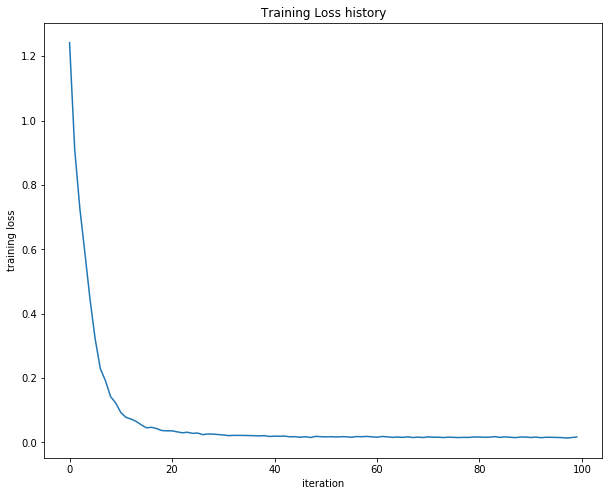

In [56]:

net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data

In [78]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [79]:
from data_utils import load_CIFAR10 ,get_CIFAR10_data

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3, 32, 32)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3, 32, 32)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3, 32, 32)
Test labels shape:  (1000,)


# Train a network

In [98]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
from TwoLayerNet import TwoLayerNet
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
                  learning_rate=1e-4, learning_rate_decay=0.95,
                  num_iters=1000,reg=0.25,verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302748
iteration 100 / 1000: loss 2.302398
iteration 200 / 1000: loss 2.295146
iteration 300 / 1000: loss 2.235414
iteration 400 / 1000: loss 2.190536
iteration 500 / 1000: loss 2.159586
iteration 600 / 1000: loss 2.075752
iteration 700 / 1000: loss 2.034794
iteration 800 / 1000: loss 2.144658
iteration 900 / 1000: loss 2.019208
Validation accuracy:  0.285


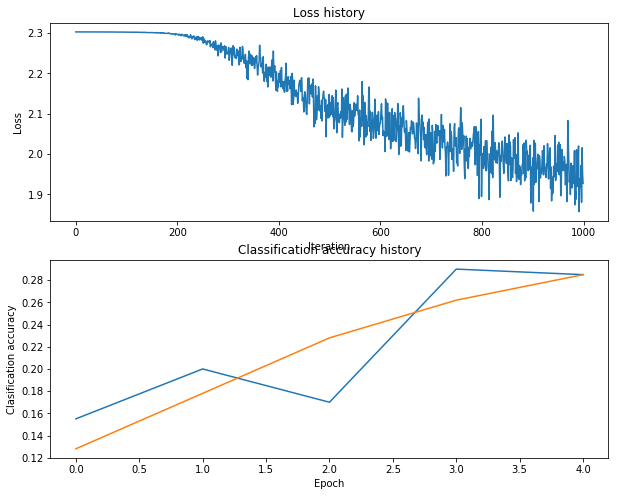

In [85]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

(50, 32, 32, 3)


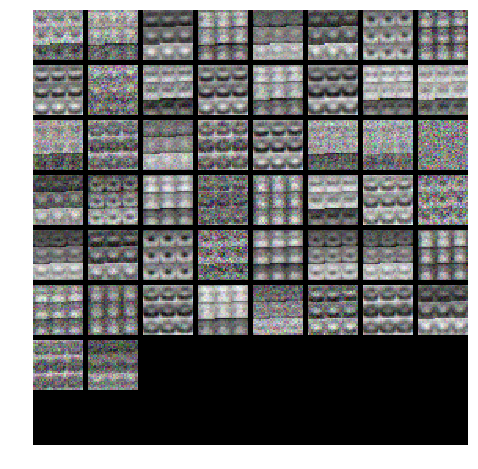

In [104]:
from vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    print(W1.shape)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

In [105]:
best_net = None # store the best model into this 

input_size = 32 * 32 * 3
num_classes = 10
best_acc=-1
# Train the network
for bs in [200, 400]:
    for lr in [1e-3, 1e-4, 1e-5]:
        for hidden_size in [50, 100, 200]:
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=2000, batch_size=bs,
                        learning_rate=lr, learning_rate_decay=0.9,
                        reg=0.5, verbose=True)

            # Predict on the validation set
            val_acc = (net.predict(X_val) == y_val).mean()
            print ('batch_size = %d, lr = %f, hidden size = %f, Valid_accuracy: %f' %(bs, lr, hidden_size,val_acc))
            if val_acc > best_acc:
                best_acc = val_acc
                best_net = net

iteration 0 / 2000: loss 2.302980
iteration 100 / 2000: loss 2.038651
iteration 200 / 2000: loss 1.821257
iteration 300 / 2000: loss 1.764198
iteration 400 / 2000: loss 1.622352
iteration 500 / 2000: loss 1.620550
iteration 600 / 2000: loss 1.647478
iteration 700 / 2000: loss 1.511066
iteration 800 / 2000: loss 1.535177
iteration 900 / 2000: loss 1.464977
iteration 1000 / 2000: loss 1.518936
iteration 1100 / 2000: loss 1.535116
iteration 1200 / 2000: loss 1.538971
iteration 1300 / 2000: loss 1.438481
iteration 1400 / 2000: loss 1.482965
iteration 1500 / 2000: loss 1.538476
iteration 1600 / 2000: loss 1.520592
iteration 1700 / 2000: loss 1.448414
iteration 1800 / 2000: loss 1.432337
iteration 1900 / 2000: loss 1.449851
batch_size = 200, lr = 0.001000, hidden size = 50.000000, Valid_accuracy: 0.471000
iteration 0 / 2000: loss 2.303336
iteration 100 / 2000: loss 1.921103
iteration 200 / 2000: loss 1.716368
iteration 300 / 2000: loss 1.671872
iteration 400 / 2000: loss 1.558786
iteration 5

iteration 300 / 2000: loss 1.671870
iteration 400 / 2000: loss 1.613469
iteration 500 / 2000: loss 1.570552
iteration 600 / 2000: loss 1.535463
iteration 700 / 2000: loss 1.548487
iteration 800 / 2000: loss 1.570246
iteration 900 / 2000: loss 1.534177
iteration 1000 / 2000: loss 1.417726
iteration 1100 / 2000: loss 1.472863
iteration 1200 / 2000: loss 1.519901
iteration 1300 / 2000: loss 1.446365
iteration 1400 / 2000: loss 1.461018
iteration 1500 / 2000: loss 1.365699
iteration 1600 / 2000: loss 1.345700
iteration 1700 / 2000: loss 1.353607
iteration 1800 / 2000: loss 1.372604
iteration 1900 / 2000: loss 1.439231
batch_size = 400, lr = 0.001000, hidden size = 100.000000, Valid_accuracy: 0.514000
iteration 0 / 2000: loss 2.304084
iteration 100 / 2000: loss 1.901112
iteration 200 / 2000: loss 1.752009
iteration 300 / 2000: loss 1.662966
iteration 400 / 2000: loss 1.546876
iteration 500 / 2000: loss 1.617023
iteration 600 / 2000: loss 1.510834
iteration 700 / 2000: loss 1.535061
iteratio

best validation accuracy =  0.52
(200, 32, 32, 3)


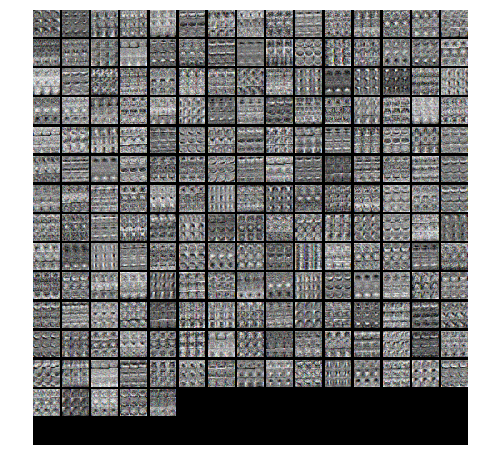

In [106]:
print('best validation accuracy = ', best_acc)
show_net_weights(best_net)

In [107]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)


Test accuracy:  0.53
